In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from nltk.tokenize import RegexpTokenizer

In [ ]:
main_df = pd.read_csv('./data/main_data.csv')
main_df.shape

## Hugging Face

In [14]:
# classifier = pipeline("zero-shot-classification",
#                       model="facebook/bart-large-mnli")

classifier = pipeline("sentiment-analysis",
                      model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Please install emoji: pip3 install emoji


In [15]:
# df = main_df.sample(10)
sequence_to_classify = list(main_df['post_unstemmed'])
candidate_labels = ['dc','marvel']
sentiment_result = classifier(sequence_to_classify,truncation = True)
sentiment_df = pd.DataFrame(sentiment_result)
sentiment_df['post_unstemmed'] =  main_df['post_unstemmed'].reset_index(drop=True)
sentiment_df

,label,score,post_unstemmed
0,POS,0.924385,agree marvel movies two make top
1,NEU,0.938668,captain america fan film fight scene
2,NEU,0.969352,guy phd dr strange thought
3,POS,0.648603,top marvel movies agree
4,NEU,0.943673,spider man lotus controversy
...,...,...,...
19245,NEU,0.822718,apparently cyborg batfleck supposed camo peace...
19246,NEU,0.940822,watch theatrical justice league snyder cut rew...
19247,NEU,0.943281,since dwayne confident black adam fight superm...
19248,NEG,0.969725,sad batfleck cyborg robbed


In [16]:
main_df['sentiment'] = sentiment_df['label']
main_df['sentiment_score'] = sentiment_df['score']
main_df

,True,index,subreddit,num_comments,created_utc,author,title_word_count,title_length,post,post_stemmed,post_unstemmed,sentiment,sentiment_score
0,0,0,1,0,1655815616,AlknA24,15,68,Can we agree that out of all the marvel movies...,agre marvel movi two make top,agree marvel movies two make top,POS,0.924385
1,1,1,1,0,1655815581,SteveHarrington2025,6,36,Captain America Fan Film Fight Scene,captain america fan film fight scene,captain america fan film fight scene,NEU,0.938668
2,2,2,1,0,1655814965,Jack-mclaughlin89,13,61,"For a guy with a PHD, Dr Strange should have t...",guy phd dr strang thought,guy phd dr strange thought,NEU,0.969352
3,3,3,1,0,1655814697,AlknA24,9,38,My top 5 Marvel movies (5-1) - Agree ?,top marvel movi agre,top marvel movies agree,POS,0.648603
4,4,4,1,0,1655814645,Neil-patil,5,38,More on Spider-Man Lotus’ controversy.,spider man lotu controversi,spider man lotus controversy,NEU,0.943673
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19245,19309,19985,0,2,1645293583,KeenBean1997,13,78,"So, apparently Cyborg and Batfleck were suppos...",appar cyborg batfleck suppos camo peacemak,apparently cyborg batfleck supposed camo peace...,NEU,0.822718
19246,19310,19986,0,51,1645293472,Prestigious_Bonus322,11,63,Should I watch the theatrical justice league o...,watch theatric justic leagu snyder cut rewatch...,watch theatrical justice league snyder cut rew...,NEU,0.940822
19247,19311,19987,0,15,1645293170,697ox,14,84,Since Dwayne is confident that black Adam will...,sinc dwayn confid black adam fight superman co...,since dwayne confident black adam fight superm...,NEU,0.943281
19248,19312,19988,0,553,1645292628,acetrainer03,9,50,This is just sad. Batfleck and Cyborg were rob...,sad batfleck cyborg rob,sad batfleck cyborg robbed,NEG,0.969725


<AxesSubplot:title={'center':'Sentiment Score (Marvel)'}, xlabel='sentiment', ylabel='Count'>

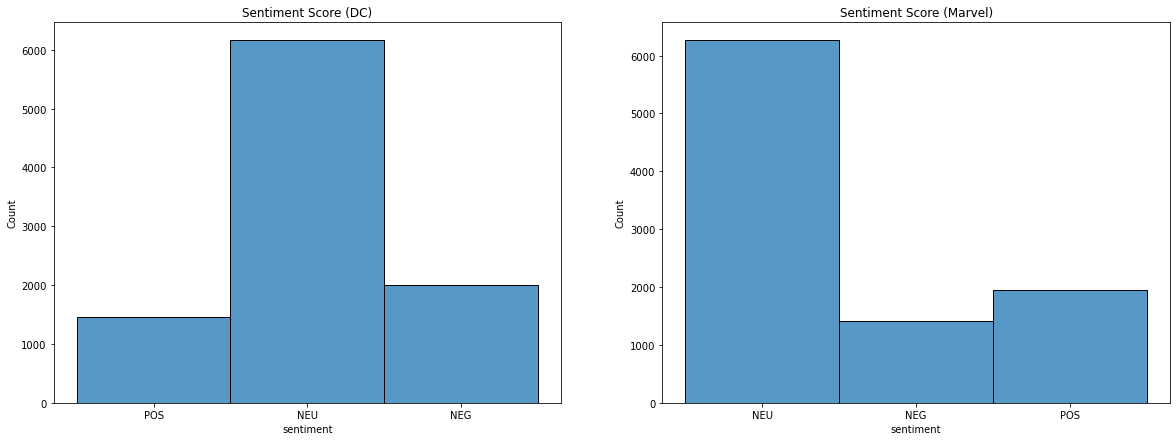

In [17]:
marvel_sentiment = main_df.loc[main_df['subreddit']==0,:]
dc_sentiment = main_df.loc[main_df['subreddit']==1,:]
fig, axs = plt.subplots(1, 2, figsize=(20,7))
axs[0].title.set_text('Sentiment Score (DC)')
axs[1].title.set_text('Sentiment Score (Marvel)')
sns.histplot(data = dc_sentiment, x = 'sentiment',ax = axs[0])
sns.histplot(data = marvel_sentiment, x = 'sentiment',ax = axs[1])

In [18]:
pd.DataFrame.to_csv(main_df,'./data/sentiment_result.csv',index_label=True)

In [2]:
sentiment_df = pd.read_csv('./data/sentiment_result.csv')
dc_sentiment = sentiment_df.loc[sentiment_df['subreddit']==0,:]
marvel_sentiment = sentiment_df.loc[sentiment_df['subreddit']==1,:]

In [7]:
regex_tokenizer = RegexpTokenizer('\w+')
tokens = [regex_tokenizer.tokenize(word.lower()) for word in sentiment_df['post_unstemmed']]


In [8]:
tokens

[['agree', 'marvel', 'movies', 'two', 'make', 'top'],
 ['captain', 'america', 'fan', 'film', 'fight', 'scene'],
 ['guy', 'phd', 'dr', 'strange', 'thought'],
 ['top', 'marvel', 'movies', 'agree'],
 ['spider', 'man', 'lotus', 'controversy'],
 ['one', 'underrated', 'characters', 'marvel'],
 ['favorite',
  'subtle',
  'joke',
  'mcu',
  'one',
  'always',
  'manages',
  'crack',
  'even',
  'hear',
  'first',
  'watches'],
 ['anyone',
  'else',
  'think',
  'scene',
  'trailer',
  'looks',
  'like',
  'bad',
  'green',
  'screen',
  'editing',
  'lighting',
  'looks'],
 ['would',
  'ok',
  'future',
  'projects',
  'shows',
  'mcu',
  'stopped',
  'making',
  'films',
  'like',
  'title',
  'says',
  'would',
  'feel',
  'mcu',
  'stopped',
  'making',
  'feature',
  'length',
  'films',
  'produced',
  'new',
  'series',
  'every',
  'month',
  'prefer',
  'shows',
  'simply',
  'like',
  'two',
  'three',
  'movies',
  'better',
  'stories',
  'development',
  'screen',
  'time',
  'over